# Dataset Description<br>

This dataset consists of TV shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
tvdata = pd.read_csv("/Users/ruochenshen/Documents/kaggle/netflix/netflix_titles.csv")
tvdata.shape

(6234, 12)

In [4]:
tvdata.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


 # Data Cleaning<br>
 1. Keep only one observation of duplicated observations.<br><br>
 2. Convert data type of "date_added" to datetime.<br><br>
 3. Remove "min" or "season" in the duration column. Use "duration" to record movie length, and add a new                  column "season" record the number of seasons of TV shows.<br><br>

In [5]:
#Keep only one observation of duplicated observations.
tvdata[tvdata.duplicated(["type", "title", "director", "cast", "country"], keep = False)]
#after checking, the two observations are identical except show_id
tvdata = tvdata.drop_duplicates(subset = ["type", "title", "director", "cast", "country"])
tvdata.shape

#Convert "date_added" to datetime.
tvdata["date_added"] = pd.to_datetime(tvdata["date_added"])
tvdata.head()

#"duration" records movie length, and "season" records the number of seasons of TV shows
season = tvdata["duration"].str.contains("Season")
tvdata["season"] = tvdata["duration"].where(season, "")
tvdata["duration"] = tvdata["duration"].mask(season, "")
tvdata["duration"] = tvdata["duration"].str.split().str[0].fillna(0).astype(int)
tvdata["season"] = tvdata["season"].str.split().str[0].fillna(0).astype(int)
tvdata.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,season
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,0
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,0
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,0,Kids' TV,"With the help of three human allies, the Autob...",1
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,0,Kids' TV,When a prison ship crash unleashes hundreds of...,1
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99,Comedies,When nerdy high schooler Dani finally attracts...,0


# Data Analysis<br>

## 1. Content Type

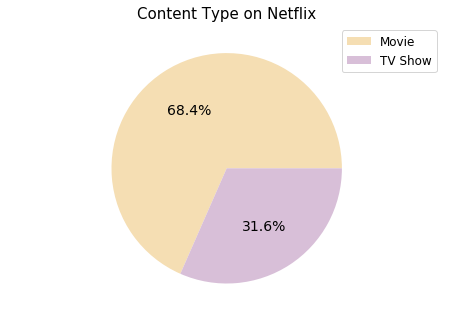

In [6]:
grouped = tvdata.groupby("type")
type_cnt = grouped["show_id"].agg(["count"])
type_cnt
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('equal')
ax.pie(type_cnt, autopct='%1.1f%%', colors = ['wheat', 'thistle'], textprops={'fontsize': 14})
ax.set_title("Content Type on Netflix", fontsize = 15)
ax.legend(labels = type_cnt.index, loc=1, prop={'size': 12})
plt.show()

### Conclusion: <br>
Movie makes up 68.4% of content on Netflix, while TV show makes up 31.6%. Movie is still the main content on Netflix up to 2019.

## 2. Content Added

In [7]:
#prepare the dataframe: type, release_year, cnt
grouped2 = tvdata.groupby(["type", "release_year"])
type_cnt2 = grouped2["show_id"].agg(["count"])
type_cnt2.head()
type_cnt3 = type_cnt2.reset_index()
type_cnt3.head()

#pivot table, convert NA to 0
type_cnt4 = type_cnt3.pivot(index = "release_year", columns = "type", values = "count")
type_cnt4.head()
type_cnt4 = type_cnt4.fillna(0)
type_cnt4.head()
type_cnt4["Movie"] = type_cnt4["Movie"].astype(int)
type_cnt4["TV Show"] = type_cnt4["TV Show"].astype(int)
type_cnt4.head()

type,Movie,TV Show
release_year,,
1925,0,1
1942,2,0
1943,3,0
1944,3,0
1945,3,0


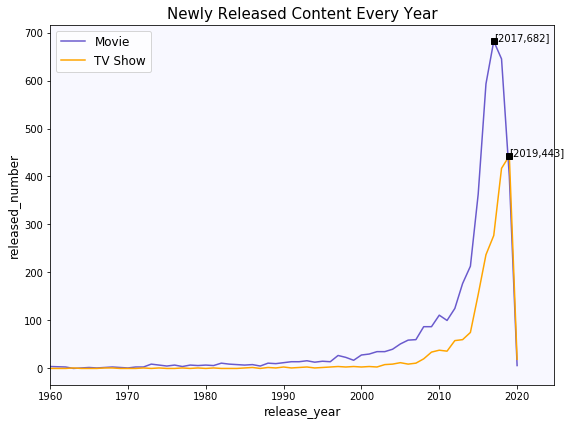

In [8]:
#get the peak coordinate value
movie_max = type_cnt4["Movie"].max()
tv_max = type_cnt4["TV Show"].max()
movie_max_year = type_cnt4.index[type_cnt4["Movie"] == movie_max]
tv_max_year = type_cnt4.index[type_cnt4["TV Show"] == tv_max]

#plot
fig = plt.figure(figsize = (7, 5))
ax = fig.add_axes([0,0,1,1])
ax.set_facecolor("ghostwhite")
ax.plot(type_cnt4.index, type_cnt4["Movie"], color = 'slateblue')
ax.plot(type_cnt4.index, type_cnt4["TV Show"], color = 'orange')
plt.title("Newly Released Content Every Year", fontsize = 15)
plt.xlabel("release_year", fontsize = 12)
plt.ylabel("released_number",  fontsize = 12)
plt.xlim(left = 1960)
plt.plot(movie_max_year, movie_max,'ks')
plt.plot(tv_max_year, tv_max,'ks')
movie_max_node='['+str(movie_max_year[0])+','+str(movie_max)+']'
tv_max_node='['+str(tv_max_year[0])+','+str(tv_max)+']'
plt.annotate(movie_max_node, xy=(movie_max_year[0], movie_max))
plt.annotate(tv_max_node, xy=(tv_max_year[0], tv_max))
plt.legend(["Movie", "TV Show"], prop = {"size":12})
plt.show()


### Conclusion: <br>

1. The newly released content on Netflix shows an increasing trend, especially after 2010. <br><br>
2. The max number of newly released Movies happens in 2017, which is 682; while that of TV shows                      happens in 2019, which is 443.<br><br>
3. From 2013 to now, the newly added content on Netflix increase most rapidly.<br><br>

## 3. Content From Different Countries

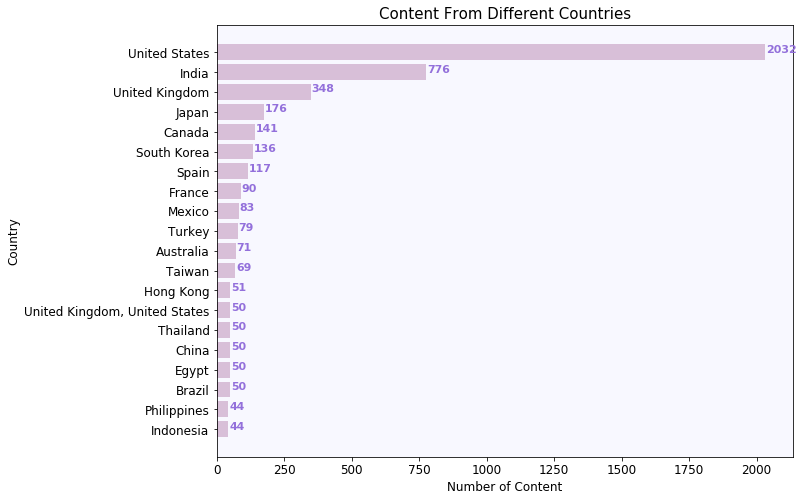

In [9]:
#data aggragation
grouped_country = tvdata.groupby("country")
country_cnt = grouped_country["show_id"].agg(["count"])
country_cnt = country_cnt.sort_values(by = ["count"], ascending = False)
country_cnt.head(20)

#plot
country_cnt_head = country_cnt.head(20).sort_values(by = "count")
fig = plt.figure(figsize = (8, 6))
ax = fig.add_axes([0,0,1,1])
ax.barh(country_cnt_head.index, country_cnt_head["count"], color = "thistle")
plt.title("Content From Different Countries", fontsize = 15)
plt.xlabel("Number of Content", fontsize = 12)
plt.ylabel("Country", fontsize = 12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
ax.set_facecolor("ghostwhite")
for i, v in enumerate(country_cnt_head["count"]):
    ax.text(v + 3, i, str(v), fontsize = 11, fontweight = "bold", color = "mediumpurple")
plt.show()

### Conclusion: <br>
Most of content on Netflix is from United States, which is nearly 3 times of the content from India, the               country which is in the second place. From this we can see, though Netflix has users from lots of                     countries, it is most popular in United States.<br><br>

## 4. Content Rating

In [10]:
#prepare the dataframe: rating, type, cnt
grouped_rating = tvdata.groupby(["rating", "type"])
rating_cnt = grouped_rating["show_id"].agg(["count"])
rating_cnt.head()
rating_cnt = rating_cnt.reset_index()
rating_cnt.head()

#pivot table, convert NA to 0
rating_cnt = rating_cnt.pivot(index = "rating", columns = "type", values = "count")
rating_cnt.head()
rating_cnt = rating_cnt.fillna(0)
rating_cnt.head()
rating_cnt["Movie"] = rating_cnt["Movie"].astype(int)
rating_cnt["TV Show"] = rating_cnt["TV Show"].astype(int)
rating_cnt.head()

type,Movie,TV Show
rating,,
G,36,1
NC-17,2,0
NR,202,16
PG,183,1
PG-13,286,0


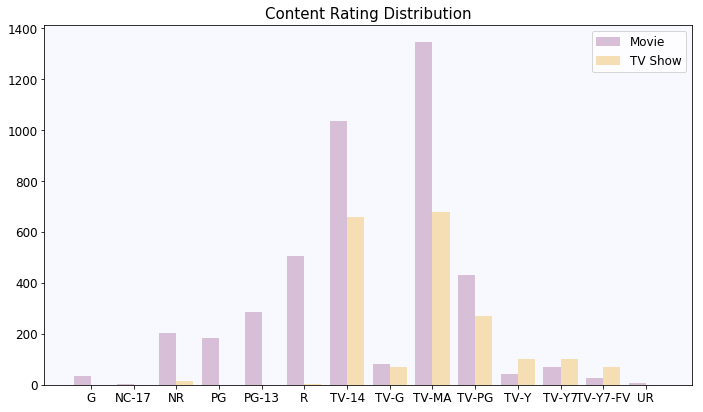

In [11]:
#plot
fig = plt.figure(figsize = (9, 5))
ax = fig.add_axes([0, 0, 1, 1])
barwidth = 0.4
x = np.arange(len(rating_cnt["Movie"]))
ax.bar(x, rating_cnt["Movie"], color = "thistle", width = barwidth)
ax.bar(x + barwidth, rating_cnt["TV Show"], color = "wheat", width = barwidth)
plt.xticks(x + 0.5 * barwidth, rating_cnt.index, fontsize = 12)
plt.yticks(fontsize = 12)
ax.set_facecolor("ghostwhite")
plt.title("Content Rating Distribution", fontsize = 15)
plt.legend(rating_cnt.columns, prop = {"size":12})
plt.show()


### Note:<br>
By googling, the explanation of ratings is shown as the following maturity levels:<br><br>
kids: TV-Y, TV-Y7, G, TV-G, PG, TV-PG<br>
teen: PG-13, TV-14<br>
adult: R, TV-MA, NC-17<br><br>

### Conclusion: <br>
1. Not all categories have TV shows, movie is the main type for most of categories.<br><br>
2. TV-14 and TV-MA are the most common categories.<br><br>
3. Most of content on Netflix is aimed to adult and teens.<br><br>

## 5. Content Duration

In [12]:
#prepare the dataframe: movie duration, cnt
movie_data = tvdata[tvdata["type"] == "Movie"][["show_id", "duration"]]
movie_data.head()
movie_data.shape
grouped = movie_data.groupby(["duration"])
movie_duration_cnt = grouped["show_id"].agg(["count"]).sort_index(axis = 0)
movie_duration_cnt.head()

,count
duration,
3,1
10,1
11,1
12,2
14,2


In [13]:
#prepare the dataframe: TV seasons, cnt
tv_data = tvdata[tvdata["type"] == "TV Show"][["show_id", "season"]]
tv_data.head()
grouped = tv_data.groupby(["season"])
tv_season_cnt = grouped["show_id"].agg(["count"])
tv_season_cnt

,count
season,
1,1321
2,304
3,158
4,61
5,46
6,22
7,21
8,16
9,7


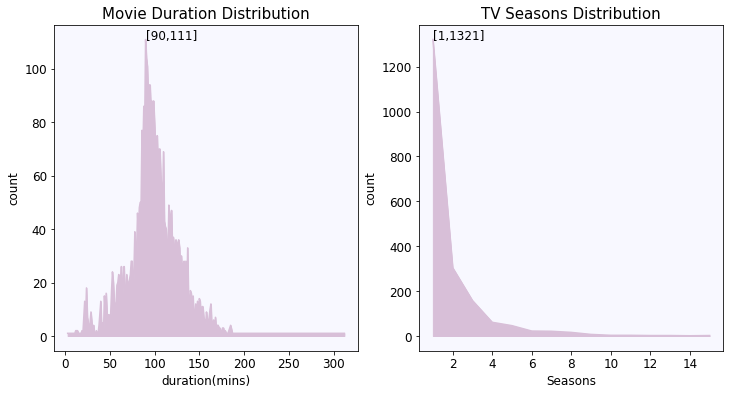

In [14]:
#get the peak coordinate values
duration_cnt_max = movie_duration_cnt["count"].max()
duration_cnt_max_index = movie_duration_cnt.index[movie_duration_cnt["count"] == duration_cnt_max]
season_cnt_max = tv_season_cnt["count"].max()
season_cnt_max_index = tv_season_cnt.index[tv_season_cnt["count"] == season_cnt_max]

#plot
fig = plt.figure(figsize = (12, 6))
(ax1, ax2) = fig.subplots(1, 2)

#Movie Duration Distribution
ax1.set_facecolor("ghostwhite")
ax1.plot(movie_duration_cnt.index, movie_duration_cnt["count"], color = "thistle", )
ax1.set_title("Movie Duration Distribution", fontsize = 15)
ax1.set_xlabel("duration(mins)", fontsize = 12)
ax1.set_ylabel("count", fontsize = 12)
ax1.fill_between(movie_duration_cnt.index, movie_duration_cnt["count"], color = "thistle")
ax1.tick_params(labelsize=12)
duration_max_node = '[' + str(duration_cnt_max_index[0]) + ',' + str(duration_cnt_max) + ']'
ax1.annotate(duration_max_node, xy=(duration_cnt_max_index[0], duration_cnt_max), fontsize = 12)

#TV Seasons Distribution
ax2.set_facecolor("ghostwhite")
ax2.plot(tv_season_cnt.index, tv_season_cnt["count"], color = "thistle", )
ax2.set_title("TV Seasons Distribution", fontsize = 15)
ax2.set_xlabel("Seasons", fontsize = 12)
ax2.set_ylabel("count", fontsize = 12)
ax2.fill_between(tv_season_cnt.index, tv_season_cnt["count"], color = "thistle")
ax2.tick_params(labelsize=12)
season_max_node = '[' + str(season_cnt_max_index[0]) + ',' + str(season_cnt_max) + ']'
ax2.annotate(season_max_node, xy=(season_cnt_max_index[0], season_cnt_max), fontsize = 12)

plt.show()

### Conclusion: <br>
1. A movie length is always around 90 minutes. Shorter than 1 hour or longer than 2 hours are not common.<br><br>
2. Most of TV shows only have 1 season, and those longer than 4 seasons are rare. <br><br>